## EDA Plan of Attack
    High level understanding of data (look at columns, nulls, shape, etc)
    Understand how to work with different question types (Multiple answer vs single answer)
    Experiment with plotly basics px vs go (Not a Plotly Tutorial)
    Go through my process of learning to build more advanced graphs
    Start understanding the question "What keywords and video length generates the most followers and vieos"

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #likley won't be used much as i'm experimenting with plotly 
import plotly.graph_objects as go #you will be learning how go and px work with me! 
import plotly.express as px 


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [69]:
#read in data 
df_agg = pd.read_csv('/Users/jimmylam/Downloads/archive (2)/Aggregated_Metrics_By_Video.csv')
df_agg_country_sub = pd.read_csv('/Users/jimmylam/Downloads/archive (2)/Aggregated_Metrics_By_Country_And_Subscriber_Status.csv')
df_ts = pd.read_csv('/Users/jimmylam/Downloads/archive (2)/Video_Performance_Over_Time.csv')
df_comments = pd.read_csv('/Users/jimmylam/Downloads/archive (2)/All_Comments_Final.csv')

In [70]:
#look at columns for each dataframe 
print(df_agg.columns)
print(df_agg_country_sub.columns)
print(df_ts.columns)
print(df_comments.columns)

Index(['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)'],
      dtype='object')
Index(['Video Title', 'External Video ID', 'Video Length', 'Thumbnail link',
       'Country Code', 'Is Subscribed', 'Views', 'Video Likes Added',
       'Video Dislikes Added', 'Video Likes Removed',
       'User Subscriptions Added', 'User Subscriptions Removed',
       'Average View Percentage', 'Average Watch Time', 'User Comments Added'],
      dtype='object')
Index(['Date', 'Video Title', 'External Video ID', 'Video Length',
       'Thumbnail link', 'Views', 'Video Likes Added', 'Video Dislikes Added',
       'Video Likes Removed', 'User Sub

## Aggregrate data

In [80]:
df_agg.drop(df_agg.index[0], inplace = True)
df_agg.reset_index(drop = True, inplace =True)
df_agg.shape


(222, 19)

In [72]:
agg_old_cols = ['Video', 'Video title', 'Video pub­lish time', 'Com­ments ad­ded',
       'Shares', 'Dis­likes', 'Likes', 'Sub­scribers lost',
       'Sub­scribers gained', 'RPM (USD)', 'CPM (USD)',
       'Av­er­age per­cent­age viewed (%)', 'Av­er­age view dur­a­tion',
       'Views', 'Watch time (hours)', 'Sub­scribers',
       'Your es­tim­ated rev­en­ue (USD)', 'Im­pres­sions',
       'Im­pres­sions click-through rate (%)']

agg_new_cols = ['Video', 'Video title', 'Video publish time', 'Comments added',
       'Shares', 'Dislikes', 'Likes', 'Subscribers lost',
       'Subscribers gained', 'RPM (USD)', 'CPM (USD)',
       'Average percentage viewed (%)', 'Average view duration',
       'Views', 'Watch time (hours)', 'Subscribers',
       'Your estimated revenue (USD)', 'Impressions',
       'Impressions click-through rate (%)']

In [73]:
col_dict = {}
for i, j in zip(agg_old_cols, agg_new_cols):
    col_dict[i] = j

In [74]:
df_agg.rename(columns = col_dict, inplace = True)
df_agg.head()

,Video,Video title,Video publish time,Comments added,Shares,Dislikes,Likes,Subscribers lost,Subscribers gained,RPM (USD),CPM (USD),Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Your estimated revenue (USD),Impressions,Impressions click-through rate (%)
0,4OZip0cgOho,How I Would Learn Data Science (If I Had to St...,"May 8, 2020",907,9583,942,46903,451,46904,6.353,12.835,36.65,0:03:09,1253559,65850.7042,46453,7959.533,26498799,3.14
1,78LjdAAw0wA,100K Channel Update + AMA Stream!,"Nov 12, 2020",412,4,4,130,15,12,2.668,6.259,6.26,0:05:14,2291,200.2966,-3,6.113,188318,0.72
2,hO_YKK_0Qck,Uber Driver to Machine Learning Engineer in 9 ...,"Jul 16, 2020",402,152,15,881,9,198,9.516,11.695,15.12,0:10:21,21350,3687.3387,189,202.963,442334,2.53
3,uXLnbdHMf8w,Why I'm Starting Data Science Over Again.,"Aug 29, 2020",375,367,22,2622,40,1957,3.143,7.943,33.41,0:02:36,49564,2148.3110,1917,155.779,521185,4.01
4,Xgg7dIKys9E,Interview with the Director of AI Research @ N...,"Aug 5, 2020",329,118,15,590,11,161,2.973,7.425,9.55,0:04:37,13429,1034.3945,150,39.920,210876,3.38


In [75]:
#scrubbing out null views
df_agg['Views'].isnull().count()
#dropping null values
df_agg.dropna(subset = ['Views'], inplace=True)


In [82]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype          
---  ------                              --------------  -----          
 0   Video                               222 non-null    object         
 1   Video title                         222 non-null    object         
 2   Video publish time                  222 non-null    datetime64[ns] 
 3   Comments added                      222 non-null    int64          
 4   Shares                              222 non-null    int64          
 5   Dislikes                            222 non-null    int64          
 6   Likes                               222 non-null    int64          
 7   Subscribers lost                    222 non-null    int64          
 8   Subscribers gained                  222 non-null    int64          
 9   RPM (USD)                           222 non-null    float64        
 10  CPM (USD)     

In [78]:
df_agg['Video publish time'] = pd.to_datetime(df_agg['Video publish time'], format = "%b %d, %Y")
df_agg['Video publish time']

0     2020-05-08
1     2020-11-12
2     2020-07-16
3     2020-08-29
4     2020-08-05
5     2020-06-20
6     2020-03-09
7     2020-06-05
8     2020-07-01
9     2020-04-06
10    2020-01-18
11    2020-12-19
12    2020-02-17
13    2020-09-18
14    2021-04-09
15    2020-08-12
16    2020-07-17
17    2020-07-08
18    2020-07-30
19    2021-02-12
20    2019-04-18
21    2020-07-24
22    2020-12-07
23    2021-11-19
24    2020-06-26
25    2020-09-26
26    2020-05-29
27    2020-04-08
28    2019-07-30
29    2020-09-09
30    2021-04-23
31    2021-12-27
32    2019-12-02
33    2019-12-16
34    2020-01-27
35    2019-12-09
36    2020-12-26
37    2020-05-15
38    2020-04-10
39    2020-05-22
40    2020-04-03
41    2020-06-12
42    2020-03-27
43    2020-10-30
44    2020-09-04
45    2021-05-28
46    2020-02-14
47    2021-04-02
48    2020-08-19
49    2021-07-31
50    2020-11-20
51    2021-01-02
52    2020-08-07
53    2020-10-05
54    2021-05-14
55    2020-07-10
56    2020-08-21
57    2020-09-11
58    2022-01-

In [79]:
df_agg['Average view duration'] = pd.to_timedelta(df_agg['Average view duration'])
df_agg['Average view duration']

0     0 days 00:03:09
1     0 days 00:05:14
2     0 days 00:10:21
3     0 days 00:02:36
4     0 days 00:04:37
5     0 days 00:05:55
6     0 days 00:02:06
7     0 days 00:03:36
8     0 days 00:04:56
9     0 days 00:06:47
10    0 days 00:05:53
11    0 days 00:03:45
12    0 days 00:02:40
13    0 days 00:05:37
14    0 days 00:03:34
15    0 days 00:05:30
16    0 days 00:06:04
17    0 days 00:03:33
18    0 days 00:06:20
19    0 days 00:02:16
20    0 days 00:02:15
21    0 days 00:02:40
22    0 days 00:01:59
23    0 days 00:03:12
24    0 days 00:03:50
25    0 days 00:02:27
26    0 days 00:04:55
27    0 days 00:07:26
28    0 days 00:03:15
29    0 days 00:06:13
30    0 days 00:03:49
31    0 days 00:04:29
32    0 days 00:03:03
33    0 days 00:02:51
34    0 days 00:03:28
35    0 days 00:02:23
36    0 days 00:02:20
37    0 days 00:03:17
38    0 days 00:09:01
39    0 days 00:01:41
40    0 days 00:02:16
41    0 days 00:02:53
42    0 days 00:03:08
43    0 days 00:03:24
44    0 days 00:04:30
45    0 da

In [51]:
#identifying more insights on general aggregate data (video length, likes, & etc.)
df_agg.describe()

,Com­ments ad­ded,Shares,Dis­likes,Likes,Sub­scribers lost,Sub­scribers gained,RPM (USD),CPM (USD),Av­er­age per­cent­age viewed (%),Views,Watch time (hours),Sub­scribers,Your es­tim­ated rev­en­ue (USD),Im­pres­sions,Im­pres­sions click-through rate (%)
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,222.000000,224.000000,2.240000e+02,224.000000,224.000000,224.000000,2.240000e+02,224.000000
mean,126.750000,353.924107,34.839286,2008.919643,217.620536,1608.084821,4.442040,11.442779,34.087277,4.971645e+04,2835.711522,1390.464286,259.537433,9.013573e+05,3.084152
std,948.732371,2736.321694,268.668317,15387.274015,3058.766918,15628.834115,1.789148,3.334781,15.118746,3.810302e+05,21662.566897,12647.246927,2011.119492,6.967916e+06,1.670448
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.439000,5.230000,6.000000e+01,1.068400,-21.000000,0.000000,3.650000e+02,0.490000
25%,18.000000,19.000000,1.000000,163.500000,2.000000,27.000000,3.220750,9.379500,23.602500,3.940000e+03,177.037125,19.750000,12.208250,9.947100e+04,1.925000
50%,37.000000,46.500000,4.000000,342.500000,7.000000,70.000000,4.334500,11.169500,35.120000,8.347500e+03,397.852200,62.500000,32.595500,1.541925e+05,2.895000
75%,66.250000,114.250000,11.000000,716.000000,14.000000,245.500000,5.372250,12.901000,43.462500,1.836875e+04,1145.621400,230.500000,96.814750,2.894885e+05,3.975000
max,14197.000000,39640.000000,3902.000000,225021.000000,45790.000000,229241.000000,10.387000,37.786000,76.600000,5.568487e+06,317602.353600,183451.000000,29068.652000,1.009541e+08,11.510000


<AxesSubplot:>

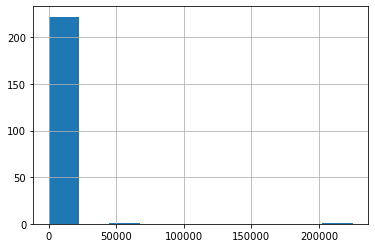

In [6]:
#likes distribution
df_agg.Likes.hist(bins = 10)

     view_like_ratio                                        Video title
138        67.036437  Predicting Crypto-Currency Price Using RNN lST...
75         66.985507          Should You Get A Masters in Data Science?
151        61.850575  Reviewing Your Data Science Projects - Episode...
223        60.000000                     ProjectDemoCSC478_UFCFightData
21         53.008940  Scrape Twitter Data in Python with Twitterscra...
93         46.830951  How to Set Up Your Data Science Environment (A...
109        45.275269  Reviewing Your Data Science Resumes - Episode ...
158        44.616883                How to Simulate NBA Games in Python
216        44.349206  How To Build A Word Cloud From Scraped Data (P...
20         43.437555                            Why I Quit Data Science
72         43.272102                     Is Data Science Right For You?
204        43.163522  Predicting Season Long NBA Wins Using Multiple...
177        43.068702  Applying Data Science To My YouTube Data: 

<AxesSubplot:>

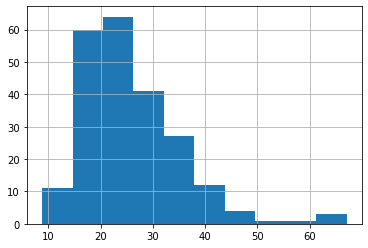

In [8]:
#basic feature engieering example
df_agg['view_like_ratio'] = df_agg.Views / df_agg.Likes
print(df_agg[['view_like_ratio','Video title']].sort_values('view_like_ratio',ascending=False))
df_agg.view_like_ratio.hist()

# Country Subs

In [9]:
df_agg_country_sub.head()

,Video Title,External Video ID,Video Length,Thumbnail link,Country Code,Is Subscribed,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
0,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,HK,True,23,1,0,0,2,0,0.671870,39.640348,0
1,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,ME,True,3,0,0,0,0,0,0.498870,29.433333,0
2,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,RW,True,2,0,0,0,0,0,0.681780,40.225000,0
3,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,US,True,979,81,6,8,16,4,0.694854,40.996389,0
4,🌶 Hot Topics in Tech: Data Science Explained #...,OtqQYqRNDGI,59,https://i.ytimg.com/vi/OtqQYqRNDGI/hqdefault.jpg,DE,False,75,3,0,1,0,0,0.661515,39.029373,0


In [84]:
df_agg_country_sub.describe()

,Video Length,Views,Video Likes Added,Video Dislikes Added,Video Likes Removed,User Subscriptions Added,User Subscriptions Removed,Average View Percentage,Average Watch Time,User Comments Added
count,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,55292.000000,53854.000000,53854.000000,55292.0
mean,896.678073,100.573157,4.239311,0.106055,0.175577,2.365279,0.053389,0.347821,205.297156,0.0
std,927.380801,1704.966002,65.291451,2.507351,3.601171,65.889539,0.766945,0.259734,206.542106,0.0
min,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,375.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145948,85.442891,0.0
50%,545.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.320983,170.139725,0.0
75%,934.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.486153,259.449958,0.0
max,5029.000000,285593.000000,9165.000000,399.000000,436.000000,9599.000000,103.000000,4.967797,5027.660000,0.0


In [7]:
#views by country 
#looks like these numbers are daily averages, still useful?
pd.pivot_table(df_agg_country_sub, index = 'Country Code', values = 'Views').sort_values('Views',ascending = False)

,Views
Country Code,
US,3043.707865
IN,2596.651685
GB,537.476404
CA,500.840090
DE,386.887640
AU,261.337079
BR,257.119369
ID,253.950339
FR,177.594595
